<a href="https://colab.research.google.com/github/IboPMoro/Walmart_Forecast/blob/main/Neural_Propeth_Wallmart_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install neuralprophet[live]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline
import time
import seaborn as sns
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
from google.colab import drive 
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Final/Walmart_Store_sales.csv')
pd.options.display.float_format = '{:,.2f}'.format 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True,yearfirst=False)

In [ ]:
data = df[['Date','Weekly_Sales']].copy()
data.dropna(inplace=True)
data.columns = ['ds','y']
data.head()

,ds,y
0,2010-02-05,"1,643,690.90"
1,2010-02-12,"1,641,957.44"
2,2010-02-19,"1,611,968.17"
3,2010-02-26,"1,409,727.59"
4,2010-03-05,"1,554,806.68"


In [ ]:
df= data.groupby('ds',as_index=False)['y'].sum()
df

,ds,y
0,2010-02-05,"49,750,740.50"
1,2010-02-12,"48,336,677.63"
2,2010-02-19,"48,276,993.78"
3,2010-02-26,"43,968,571.13"
4,2010-03-05,"46,871,470.30"
...,...,...
138,2012-09-28,"43,734,899.40"
139,2012-10-05,"47,566,639.31"
140,2012-10-12,"46,128,514.25"
141,2012-10-19,"45,122,410.57"


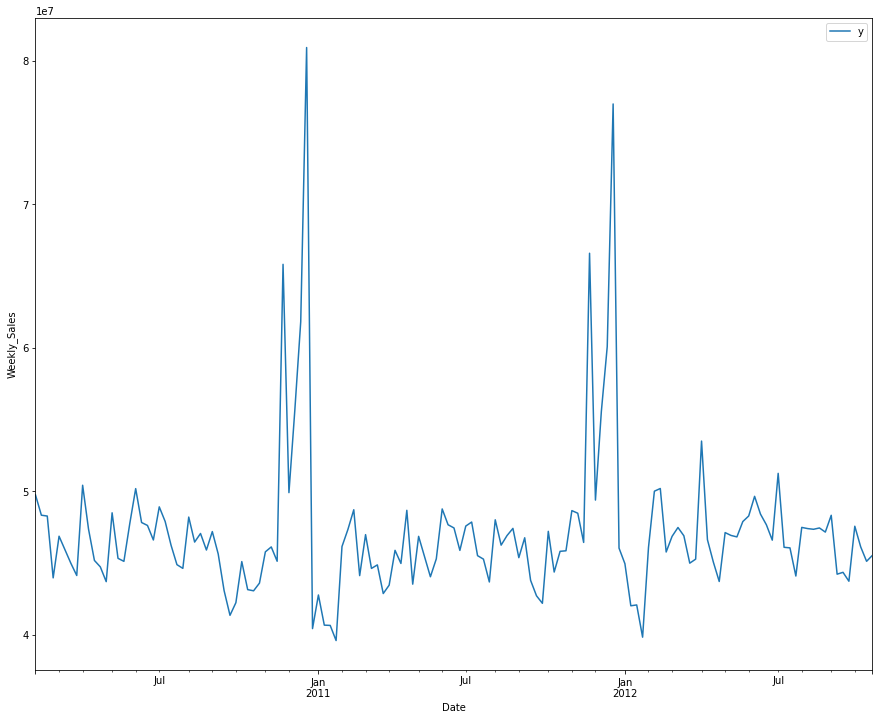

In [ ]:
ax = df.set_index('ds').plot(figsize=(15, 12))
ax.set_ylabel('Weekly_Sales')
ax.set_xlabel('Date')
plt.show()

In [ ]:
m = NeuralProphet(
    growth="linear", 
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,

)
df_train, df_test = m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.301% of the data.
INFO:NP.df_utils:Major frequency W-FRI corresponds to 99.301% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as W-FRI
INFO:NP.df_utils:Dataframe freq automatically defined as W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
metrics = m.fit(df_train, freq='W-FRI')

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.13% of the data.
INFO:NP.df_utils:Major frequency W-FRI corresponds to 99.13% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_se

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
future = m.make_future_dataframe(df_train,periods=28)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.13% of the data.
INFO:NP.df_utils:Major frequency W-FRI corresponds to 99.13% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
future.tail()

,ds,y
23,2012-09-28,None
24,2012-10-05,None
25,2012-10-12,None
26,2012-10-19,None
27,2012-10-26,None


In [ ]:
df_test.tail()

,ds,y
23,2012-09-28,"43,734,899.40"
24,2012-10-05,"47,566,639.31"
25,2012-10-12,"46,128,514.25"
26,2012-10-19,"45,122,410.57"
27,2012-10-26,"45,544,116.29"


In [ ]:
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 96.429% of the data.
INFO:NP.df_utils:Major frequency W-FRI corresponds to 96.429% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 96.429% of the data.
INFO:NP.df_utils:Major frequency W-FRI corresponds to 96.429% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly
23,2012-09-28,None,"45,415,560.00","48,899,936.00","-3,484,376.25"
24,2012-10-05,None,"46,054,000.00","48,922,120.00","-2,868,121.00"
25,2012-10-12,None,"46,402,748.00","48,944,308.00","-2,541,557.75"
26,2012-10-19,None,"46,320,448.00","48,966,492.00","-2,646,043.00"
27,2012-10-26,None,"46,134,492.00","48,988,676.00","-2,854,183.25"


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


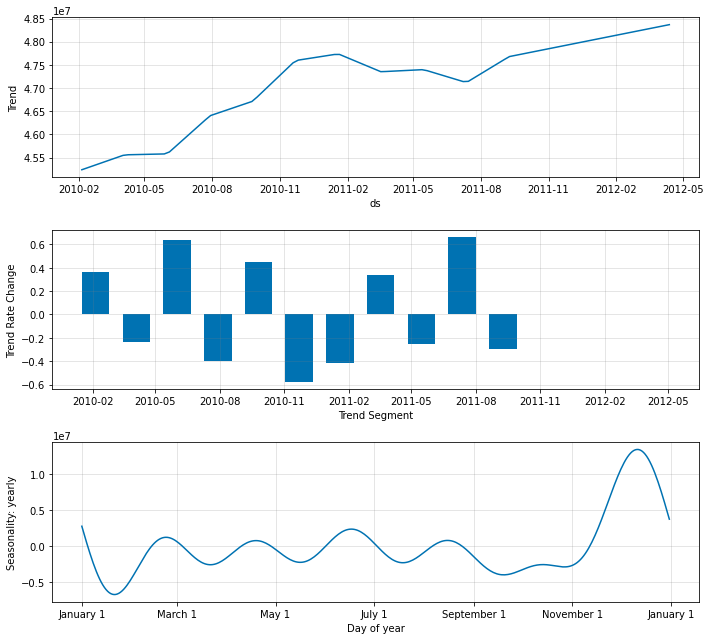

In [ ]:
m.plot_parameters();

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


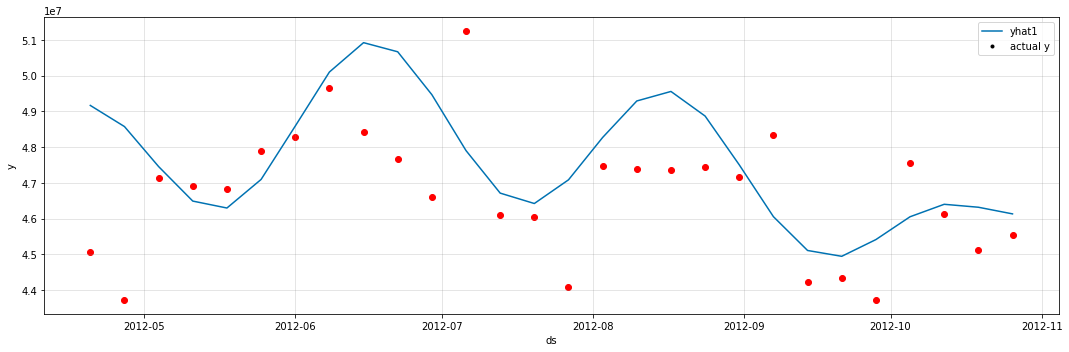

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.ds, df_test['y'], color='r')
fig = m.plot(forecast, ax=ax)

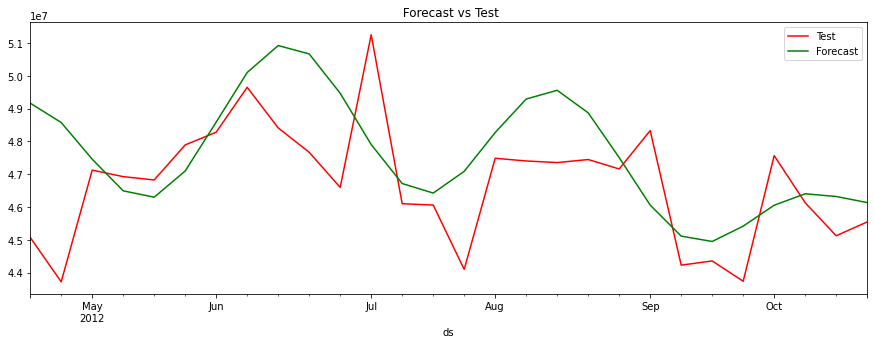

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
df_test.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
forecast.plot(kind='line',x='ds',y='yhat1', color='green',label='Forecast', ax=ax)
plt.title(' Forecast vs Test')
plt.show()

METRICAS: 
MAPE
MAE
MSE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
MAPE = mean_absolute_percentage_error(df_test['y'],forecast['yhat1'])
MAPE

0.0331738554499692

In [ ]:
MAE = mean_absolute_error(df_test['y'],forecast['yhat1'])
MAE

1541411.7021428575

In [ ]:
MSE = mean_squared_error(df_test['y'],forecast['yhat1'])
MSE

3948992412222.5435